In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

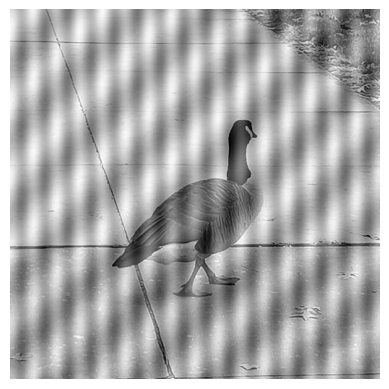

In [26]:
image = cv2.imread('duck.jpeg', cv2.IMREAD_GRAYSCALE)

# show
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

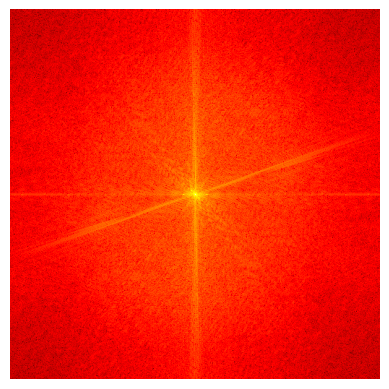

In [27]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)

# show
plt.imshow(magnitude_spectrum, cmap='hot')
plt.axis('off')
plt.show()

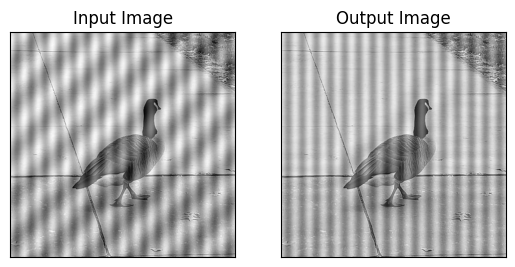

In [28]:
# band stop filter (notch filter)
noises = [[239.96445273, 255.77032735],
 [250.77754671, 250.36378036],
 [259.96867659, 260.63621964],
 [271.32242527, 255.22967265]]

row, col = image.shape
for i in range(row):
    for j in range(col):
        for noise in noises:
            u0, v0 = noise
            d = pow(i-u0, 2) + pow(j-v0, 2)
            if d < 8:
                fshift[i, j] = 0

# reconstruct image
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


plt.subplot(121),plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap='gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()